# importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_45404d115c704828a8b45574c15c7810 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9SIJQna3SdFmLBXdo-4lFtqFF6lIajutwH6A-oHutHUN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_45404d115c704828a8b45574c15c7810.get_object(Bucket='carperformancepredictionbyibmwats-donotdelete-pr-f1ugtxxilvugef',Key='car performance-dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

datas = pd.read_csv(body)
datas.head()


In [ ]:
datas

we will check the null values in the data set

In [ ]:
datas.isnull().any()

In [ ]:
 # NOTE:info() is a function that helps to take an overview of the data

In [64]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [65]:
datas.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [66]:
#dropping the unnecessary attributes here is the 'car name'

In [67]:
datas=datas.drop('car name',axis=1) 

In [68]:
#we will use the corr() dataframe for the comparision of two attributes. It does not work on categorical data.

In [69]:
numeric_features= datas.select_dtypes(include=[np.number])
numeric_features.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [70]:
corr_table=datas.corr() 
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.777501,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842437,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897082,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.777501,0.842437,0.897082,1.000000,0.863990,-0.686436,-0.417081,-0.452386
weight,-0.831741,0.896017,0.932824,0.863990,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686436,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.417081,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452386,-0.581024,0.205873,0.180662,1.000000


# Data Visualization

We need not to use the label encoding as there is no categorical value in the data set

In [71]:
#heatmap is the visulization of the correlation of the table that we have plotted above.This will give the clear idea.

In [72]:
#importing necessary libraries.
import matplotlib.pyplot as plt
import seaborn as sns

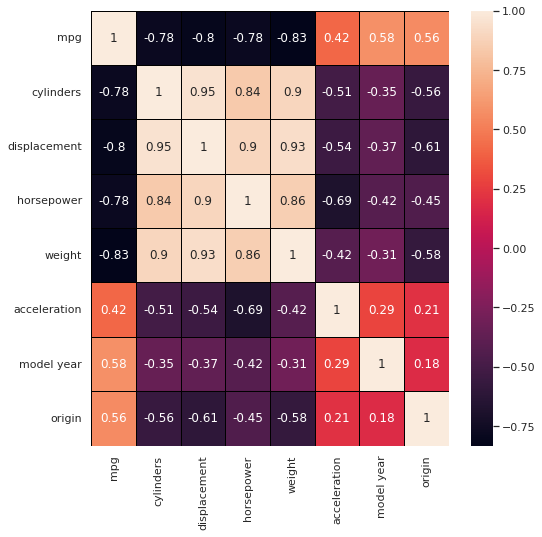

In [73]:
sns.heatmap(datas.corr(),annot=True,linecolor ='black', linewidths = 1)
fig=plt.gcf()
fig.set_size_inches(8,8)

IF A BLOCK IN THE HEATMAP IS TOO LIGHT IN COLOR IT'S THE BEST CORRELATION AND IF IT IS DARK IT HAS THE BEST NEGATIVE CORRELATION.

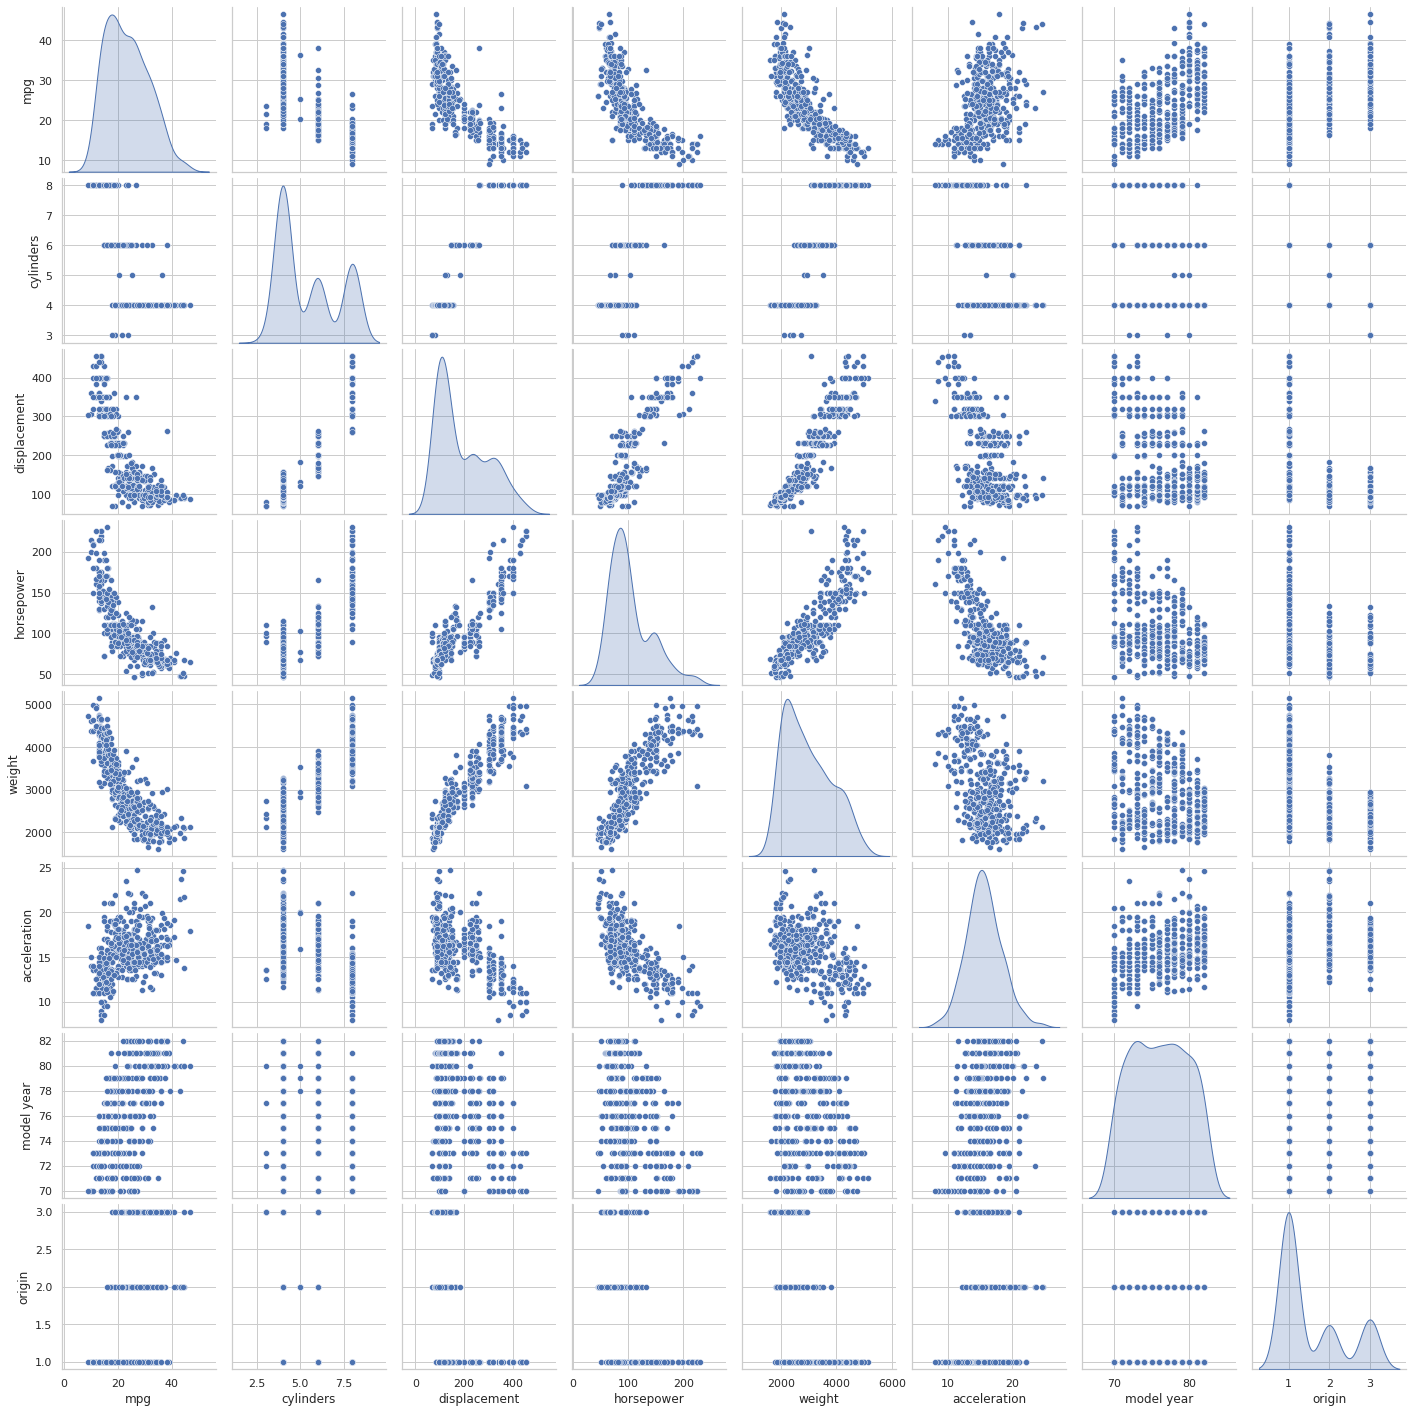

In [74]:
#PLOT THE PAIRWISE CORRELATION OF THE ATTRIBUTES TO GET THE BEST ANALYSIS
sns.pairplot(datas,diag_kind='kde') 
plt.show()

In [75]:
#REGRESSION PLOTS HELPS TO VISUALIZE THE LINEAR RELATIONSHIPS BETWEEN TWO PARAMETERS.WE HAVE TO COMPARE EACH ATTRIBUTE WITH THE MPG

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

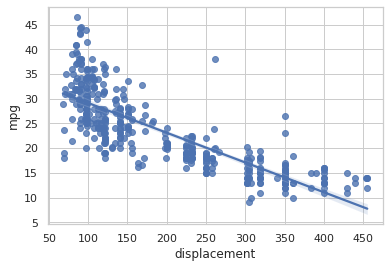

In [76]:
sns.regplot(x="displacement", y="mpg", data=datas)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

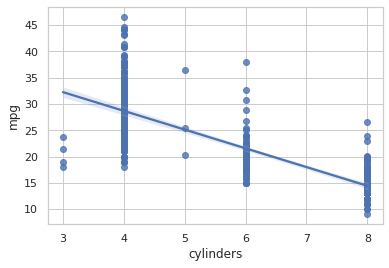

In [77]:
sns.regplot(x="cylinders", y="mpg", data=datas)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

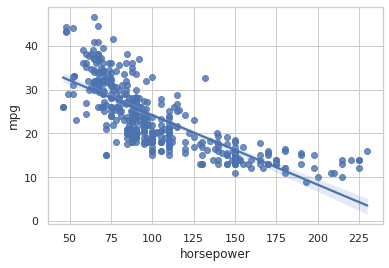

In [78]:
sns.regplot(x="horsepower", y="mpg", data=datas)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

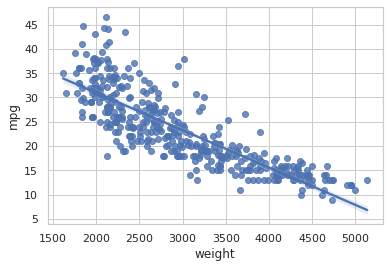

In [79]:
sns.regplot(x="weight", y="mpg", data=datas)

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

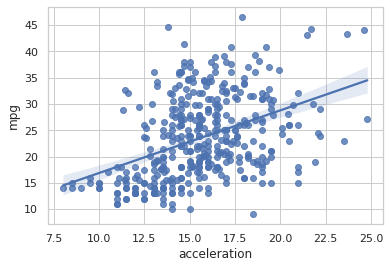

In [80]:
sns.regplot(x="acceleration", y="mpg", data=datas)

<AxesSubplot:xlabel='model year', ylabel='mpg'>

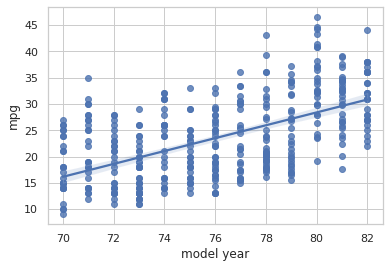

In [81]:
sns.regplot(x="model year", y="mpg", data=datas)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

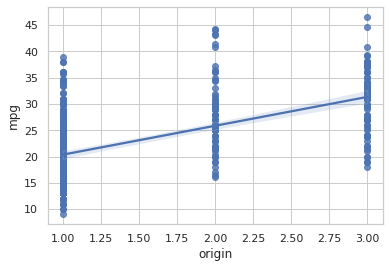

In [82]:
sns.regplot(x="origin", y="mpg", data=datas)

In [83]:
#AFTER THE ANALYSIS OF THE CORRELATION WE NEED TO FIND THE QUARTILES FOR MPG

<AxesSubplot:xlabel='mpg'>

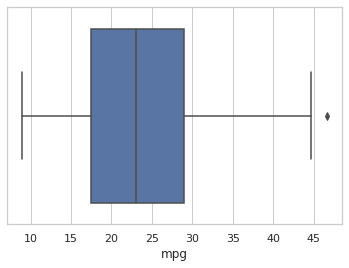

In [84]:
sns.set(style="whitegrid")
sns.boxplot(x=datas["mpg"])

Now we need to find the p value of the different values. The p value is the probability that the assumption of null hypothesis is correct

We choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the
the p-value is $
the p-value is  0.1: there is no evidence that the correlation is significant.

In [85]:
#calculating the p values between the two attributes

DISPLACEMENT VS MPG

In [86]:
import statsmodels.formula.api as smf
from scipy import stats

In [87]:
pearson_coef, p_value = stats.pearsonr(datas['displacement'], datas['mpg'])
print(pearson_coef,p_value) 

-0.8042028248058978 1.6558889101930157e-91


In [88]:
#we conclude the p value is $

CYLINDER VS MPG

In [89]:
pearson_coef, p_value = stats.pearsonr(datas['cylinders'], datas['mpg'])
print(pearson_coef,p_value) 

-0.7753962854205542 4.503992246177055e-81


Since the p-value is  0.001, the correlation between cylinders and mpg is statistically significant, and the coefficient of ~ -0.775 shows that the relationship is negative and moderately strong.

HORSEPOWER VS MPG

In [90]:
pearson_coef, p_value = stats.pearsonr(datas['horsepower'],datas['mpg'])
print( pearson_coef, p_value) 

-0.7775013636276671 8.802190914914203e-82


Since the p-value is  0.001, the correlation between horsepower and mpg is statistically significant, and the coefficient of ~ -0.771 shows that the relationship is negative and moderately strong.

WEIGHT VS MPG

In [91]:
pearson_coef, p_value = stats.pearsonr(datas['weight'],datas['mpg'])
print( pearson_coef, p_value) 

-0.831740933244335 2.9727995640500577e-103


In [92]:
#the p value is $

ACCELERTATION VS MPG

In [93]:
pearson_coef, p_value = stats.pearsonr(datas['acceleration'],datas['mpg'])
print( pearson_coef, p_value) 

0.4202889121016507 1.823091535078553e-18


Since the p-value is greater than 0.1, the correlation between acceleration and mpg is statistically significant, but the linear relationship is weak (~0.420).

MODEL YEAR VS MPG

In [94]:
pearson_coef, p_value = stats.pearsonr(datas['model year'], datas['mpg'])
print(pearson_coef, p_value) 

0.5792671330833096 4.844935813365483e-37


In [95]:
#Since the p-value is $

ORIGIN VS MPG

In [96]:
pearson_coef, p_value = stats.pearsonr(datas['origin'], datas['mpg'])
print( pearson_coef,p_value) 

0.5634503597738431 1.0114822102336483e-34


In [97]:
#Since the p-value is $

In [98]:
test=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',datas).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     167.6
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          8.18e-105
Time:                        07:16:52   Log-Likelihood:                -1129.2
No. Observations:                 398   AIC:                             2272.
Df Residuals:                     391   BIC:                             2300.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.4941      2.690     16.171      0.000      38.206      48.782
cylinders       -0.5537      0.402     -1.377      0.169      -1.344       0.237
displacement     0.0125      0.009      1.335      0.183      -0.006       0.031
horsepower      -0.0628      0.017     -3.797      0.000      -0.095      -0.030
weight          -0.0049      0.001     -6.168      0.000      -0.006      -0.003
acceleration    -0.0402      0.121     -0.332      0.740      -0.278       0.198
origin           1.4880      0.345      4.315      0.000       0.810       2.166
==============================================================================
Omnibus:                       31.632   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.557
Skew:                           0.613   Prob(JB):                     9.46e-10
Kurtosis:                       4.002   Cond. No.                     4.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

HERE THE P VALIUE OF THE ACCELERATION IS THE HIGHEST,SO IT DOES NOT MAKE MUCH EFFECT IN THE CALCULATION HENCE IT CAN BE REMOVED

# SEPERATE INTO DEPENDENT AND INDEPENDENT VARIABLE

In [99]:
x=datas[['cylinders','displacement','horsepower','weight','model year','origin']].values
x

array([[8.000e+00, 3.070e+02, 1.300e+02, 3.504e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.500e+02, 1.650e+02, 3.693e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.180e+02, 1.500e+02, 3.436e+03, 7.000e+01, 1.000e+00],
       ...,
       [4.000e+00, 1.350e+02, 8.400e+01, 2.295e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.200e+02, 7.900e+01, 2.625e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.190e+02, 8.200e+01, 2.720e+03, 8.200e+01, 1.000e+00]])

In [100]:
y=datas.iloc[:,0:1].values
y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17

SPLITTING INTO TRAINING AND TESTING DATA 

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

NORMALIZING

In [102]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x_train=sd.fit_transform(x_train)
x_test=sd.fit_transform(x_test)


# BUILDING THE MODEL WITH RANDOM FOREST REGRESSOR

In [103]:
from sklearn.ensemble import RandomForestRegressor
d=RandomForestRegressor(n_estimators=10,random_state=0)
d.fit(x_train,y_train)

/tmp/wsuser/ipykernel_658/2384570161.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  d.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

# PREDICT THE VALUES

In [104]:
y_pred=d.predict(x_test)
y_pred

array([14.85, 23.8 , 13.9 , 21.8 , 18.  , 30.9 , 36.99, 21.41, 16.45,
       25.82, 37.18, 37.89, 19.59, 26.3 , 17.57, 32.33, 28.01, 27.18,
       17.3 , 39.07, 15.95, 24.61, 22.75, 20.85, 33.94, 27.5 , 33.04,
       31.05, 31.16, 16.35, 20.34, 33.24, 19.13, 34.26, 22.31, 23.71,
       19.27, 18.99, 36.19, 12.8 , 12.5 , 14.9 , 27.92, 33.59, 29.6 ,
       22.55, 20.19, 16.65, 21.36, 30.  , 33.93, 25.5 , 18.62, 26.3 ,
       15.1 , 13.7 , 18.  , 26.2 , 31.75, 14.9 , 19.19, 26.98, 20.  ,
       21.8 , 13.3 , 14.45, 13.7 , 19.05, 25.26, 13.4 , 36.25, 13.55,
       24.1 , 18.75, 23.8 , 32.97, 27.32, 31.7 , 30.2 , 14.2 ])

# EVALUATE THE MODEL

In [105]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
accuracy

0.8876114281436949

# SAVE THE MODEL

In [106]:
import pickle 
pickle.dump(d,open('regression.pkl',"wb"))

In [107]:
pwd

'/home/wsuser/work'

#DEPLOYEMENT

In [108]:
!pip install -U ibm-watson-machine-learning

In [109]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

# AUTHENTICATE AND SET SPACE

In [110]:
wml_credentials ={
    "apikey":"CC2w9MFZnecIf0z5WKQ_R9a3bxoY1DYcmF1ZuYcv4KPW",
    "url":"https://us-south.ml.cloud.ibm.com"
    
}
client=APIClient(wml_credentials)

In [111]:
def guid_from_space_name(client,space_name):
    space =client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [112]:
space_uid = guid_from_space_name(client,'Demo_model')
print("Space UID="+space_uid)

Space UID=33098e3c-8900-402f-b7a8-4e635ea6566e


In [113]:
client.set.default_space(space_uid)

'SUCCESS'

In [114]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

# save and deploy the model

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9 ")
software_spec_uid

In [ ]:
model_details =client.repository.store_model(model=d,meta_props={
    client.repository.ModelMetaNames.NAME:"churn modelling",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}
                                            )
model_id=client.repository.get_model_id(model_details)


In [ ]:
model_id

In [ ]:
x_train[0]